In [1]:
# Import the Pandas library for data manipulation and analysis
import pandas as pd
# Import the NumPy library for numerical operations
import numpy as np 
# Import Matplotlib for plotting and visualization
import matplotlib.pyplot as plt 
# Import Seaborn for statistical data visualization
import seaborn as sns
# Import confusion_matrix and classification_report for model evaluation
from sklearn.metrics import confusion_matrix, classification_report
# Import accuracy_score for calculating the accuracy of the model
from sklearn.metrics import accuracy_score
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler
# Import train_test_split for splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
# Import TensorFlow for machine learning
import tensorflow as tf
# Import Keras for high-level neural networks API
from tensorflow import keras
# Import Dense and Activation layers for neural network architecture
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Activation, concatenate
# Import Sequential for linear stacking of layers
from keras.models import Sequential
# Import preprocessing for data preprocessing (although you already imported StandardScaler)
from sklearn import preprocessing
# Import RandomizedSearchCV for hyperparameter tuning using randomized search
from sklearn.model_selection import RandomizedSearchCV
# Import KerasClassifier to make Keras models compatible with scikit-learn
from scikeras.wrappers import KerasClassifier
# Import GridSearchCV for hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical 
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM
from keras.models import Model

In [5]:
text = pd.read_csv('data/cleaned_conversations.csv')
text['text'] = text['text'].astype(str)
text

,id,text,index
0,000890d3-ca87-4fcf-9825-877a1861588b,isabelle since last session kwame okay meet go...,0
1,016f462d-35d3-432a-aa5c-c085c935e711,good morning vanya since last session good mor...,1
2,02ce4149-965a-4e5b-91c2-2a21b5ab50ee,sophia today raj well thank great thank ask pr...,2
3,038a4758-29f2-48a1-b88d-a9af221746a6,ming great see since last meet neil well thank...,3
4,03b955fd-4771-4069-931d-dfa84f3be4e4,zoey great see annual review terrence well tha...,4
...,...,...,...
295,fa8cc372-c3f9-4d99-a85f-4c682315302c,good afternoon yara since last consultation em...,295
296,fc401cf1-f410-4363-b280-b37c601f9696,rachel feel today gabriella feel bite anxious ...,296
297,fcabaa83-ad08-4b07-a7d0-eadec97cc6d5,feel today ivan feel great train go well fanta...,297
298,fcc2e1f5-8055-4535-a890-3458f9d78619,michael today alright thank ask great thank le...,298


In [6]:
text.index.nunique()

300

In [7]:
# Assume df is your dataframe with columns 'text' and 'stress_level'
texts = text['text']
labels = text['index']

# 1. Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
vocab_size = len(tokenizer.word_index)+1

# Find the maximum length of any sequence
max_length = max([len(seq) for seq in sequences])

# 2. Pad the sequences
sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# 3. Encode the labels
encoder = LabelEncoder()
numeric_labels = encoder.fit_transform(labels)
numeric_labels = to_categorical(numeric_labels)

# Test-train split
X_train, X_test, y_train, y_test = train_test_split(sequences, numeric_labels, test_size=0.2, random_state=42)


In [8]:
model_text = Sequential()
model_text.add(Input(shape=max_length))
model_text.add(Embedding(input_dim=vocab_size, output_dim=300, input_length=max_length)) # Embedding layer will implicitly act as the input layer

model_text.add(LSTM(60, return_sequences=True))
model_text.add(LSTM(60, return_sequences=True))
model_text.add(LSTM(60, return_sequences=True))
model_text.add(LSTM(60))
model_text.add(Dense(300, activation='softmax'))
model_text.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 306, 300)          780600    
                                                                 
 lstm (LSTM)                 (None, 306, 60)           86640     
                                                                 
 lstm_1 (LSTM)               (None, 306, 60)           29040     
                                                                 
 lstm_2 (LSTM)               (None, 306, 60)           29040     
                                                                 
 lstm_3 (LSTM)               (None, 60)                29040     
                                                                 
 dense (Dense)               (None, 300)               18300     
                                                                 
Total params: 972660 (3.71 MB)
Trainable params: 972660 

In [9]:
model_text.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_text.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/10
8/8 [==============================] - 12s 710ms/step - loss: 5.7090 - accuracy: 0.0000e+00 - val_loss: 5.7139 - val_accuracy: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 4s 497ms/step - loss: 5.7030 - accuracy: 0.0042 - val_loss: 5.7277 - val_accuracy: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 4s 511ms/step - loss: 5.6974 - accuracy: 0.0042 - val_loss: 5.7727 - val_accuracy: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 4s 509ms/step - loss: 5.6836 - accuracy: 0.0042 - val_loss: 6.0464 - val_accuracy: 0.0000e+00
Epoch 5/10
8/8 [==============================] - 4s 530ms/step - loss: 5.6492 - accuracy: 0.0042 - val_loss: 6.4167 - val_accuracy: 0.0000e+00
Epoch 6/10
8/8 [==============================] - 4s 528ms/step - loss: 5.6115 - accuracy: 0.0000e+00 - val_loss: 6.7558 - val_accuracy: 0.0000e+00
Epoch 7/10
8/8 [==============================] - 5s 618ms/step - loss: 5.5791 - accuracy: 0.0042 - val_loss: 7.1050 - val_accu

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


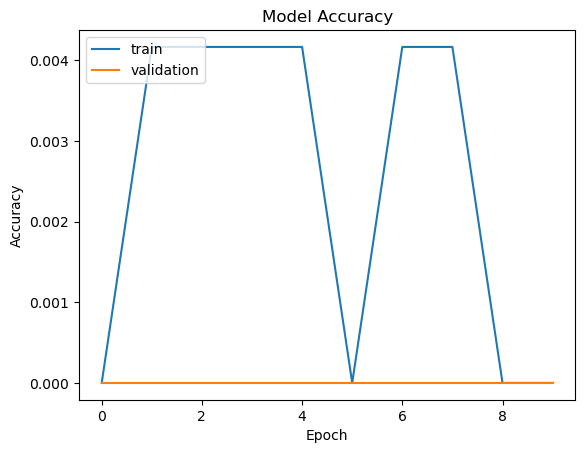

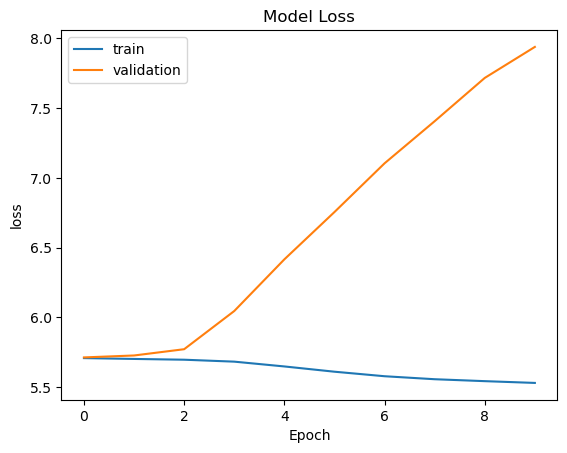

In [10]:
# Print the keys available in the 'history' object.
# This usually includes things like 'loss' and the metrics you chose to monitor, which are 'acc' and 'AUC' in this case.
print(history.history.keys())

# Plot training & validation accuracy values ('acc')
# The 'history.history' dictionary stores the history of training/validation accuracy and loss values for each epoch.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Add title and axis labels to the plot.
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Add a legend to specify which line corresponds to the training and validation phases.
plt.legend(['train', 'validation'], loc='upper left')

# Display the plot.
plt.show()

# Plot training & validation AUC values ('AUC')
# The 'history.history' dictionary stores the history of training/validation AUC values for each epoch.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Add title and axis labels to the plot.
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')

# Add a legend to specify which line corresponds to the training and validation phases.
plt.legend(['train', 'validation'], loc='upper left')

# Display the plot.
plt.show()

Excercises:

1) Discuss the possible reasons why the model are performing so poorly
1) Try to improve the performance of the model by playing around with the parameters, i.e. by changing the architechture of the model, the number of trainings epochs.
3) Did the performance change? Think about and discuss why / why not


# Multi input

In [19]:
descriptives = pd.read_csv('data/cleaned.csv')
descriptives

,patient_id,gender,age,country_of_birth,weight,height,bmi,average_daily_step_count,resting_heart_rate,heart_rate_variability,...,systolic,diastolic,mother_Hypertension,mother_No known health issues,mother_Type 2 diabetes,diet_type_Balanced,diet_type_Low-carb,diet_type_Mediterranean,diet_type_Other,diet_type_Plant-based
0,016f462d-35d3-432a-aa5c-c085c935e711,1,45,7,70.0,165.0,25.71,7997,75,51.0,...,120.0,80.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,000890d3-ca87-4fcf-9825-877a1861588b,1,32,18,62.5,165.0,22.92,7895,63,61.0,...,120.0,80.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,03b955fd-4771-4069-931d-dfa84f3be4e4,1,28,45,65.0,165.0,23.87,7995,67,54.0,...,120.0,80.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,06759796-e6cb-48cc-b099-7189dcb557e9,1,45,34,65.0,160.0,25.39,8005,65,66.0,...,120.0,80.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,02ce4149-965a-4e5b-91c2-2a21b5ab50ee,1,35,4,65.0,160.0,25.40,7995,79,65.0,...,120.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,fdadd1ce-d7ed-4233-afe0-ef32425871c5,1,45,71,68.5,165.0,25.10,8002,63,69.0,...,120.0,80.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
296,NaN,1,32,70,65.0,165.0,23.87,7828,67,63.0,...,120.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
297,6b8a69dc-6c51-4786-bb51-78dc68e7ba6f,1,35,14,60.0,165.0,22.04,7999,66,71.0,...,120.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
298,a5ba795e-8331-481e-bac0-1f3f55391212,1,32,30,65.0,165.0,23.87,7546,77,53.0,...,120.0,80.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [20]:
text

,id,text,index
0,000890d3-ca87-4fcf-9825-877a1861588b,isabelle since last session kwame okay meet go...,0
1,016f462d-35d3-432a-aa5c-c085c935e711,good morning vanya since last session good mor...,1
2,02ce4149-965a-4e5b-91c2-2a21b5ab50ee,sophia today raj well thank great thank ask pr...,2
3,038a4758-29f2-48a1-b88d-a9af221746a6,ming great see since last meet neil well thank...,3
4,03b955fd-4771-4069-931d-dfa84f3be4e4,zoey great see annual review terrence well tha...,4
...,...,...,...
295,fa8cc372-c3f9-4d99-a85f-4c682315302c,good afternoon yara since last consultation em...,295
296,fc401cf1-f410-4363-b280-b37c601f9696,rachel feel today gabriella feel bite anxious ...,296
297,fcabaa83-ad08-4b07-a7d0-eadec97cc6d5,feel today ivan feel great train go well fanta...,297
298,fcc2e1f5-8055-4535-a890-3458f9d78619,michael today alright thank ask great thank le...,298


In [28]:
df = descriptives.merge(text, left_on='patient_id', right_on='id', how='inner')
subset = df[['patient_id','id','text','index']]
subset

,patient_id,id,text,index
0,016f462d-35d3-432a-aa5c-c085c935e711,016f462d-35d3-432a-aa5c-c085c935e711,good morning vanya since last session good mor...,1
1,000890d3-ca87-4fcf-9825-877a1861588b,000890d3-ca87-4fcf-9825-877a1861588b,isabelle since last session kwame okay meet go...,0
2,03b955fd-4771-4069-931d-dfa84f3be4e4,03b955fd-4771-4069-931d-dfa84f3be4e4,zoey great see annual review terrence well tha...,4
3,06759796-e6cb-48cc-b099-7189dcb557e9,06759796-e6cb-48cc-b099-7189dcb557e9,eva since last session ryota struggle bite lat...,6
4,02ce4149-965a-4e5b-91c2-2a21b5ab50ee,02ce4149-965a-4e5b-91c2-2a21b5ab50ee,sophia today raj well thank great thank ask pr...,2
...,...,...,...,...
266,fcc2e1f5-8055-4535-a890-3458f9d78619,fcc2e1f5-8055-4535-a890-3458f9d78619,michael today alright thank ask great thank le...,298
267,fdadd1ce-d7ed-4233-afe0-ef32425871c5,fdadd1ce-d7ed-4233-afe0-ef32425871c5,hey gloria great see jeremiah well thank great...,299
268,6b8a69dc-6c51-4786-bb51-78dc68e7ba6f,6b8a69dc-6c51-4786-bb51-78dc68e7ba6f,hey serena today martin great thank excite new...,126
269,a5ba795e-8331-481e-bac0-1f3f55391212,a5ba795e-8331-481e-bac0-1f3f55391212,emma since last session deepak well thank foll...,193


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patient_id                     271 non-null    object 
 1   gender                         271 non-null    int64  
 2   age                            271 non-null    int64  
 3   country_of_birth               271 non-null    int64  
 4   weight                         271 non-null    float64
 5   height                         271 non-null    float64
 6   bmi                            271 non-null    float64
 7   average_daily_step_count       271 non-null    int64  
 8   resting_heart_rate             271 non-null    int64  
 9   heart_rate_variability         271 non-null    float64
 10  average_blood_glucose          271 non-null    float64
 11  average_fasting_glucose        271 non-null    float64
 12  specific_preferences           271 non-null    int

In [30]:
df.drop('id', axis=1, inplace=True)
df.drop('patient_id', axis=1, inplace=True)
df= df.dropna()
df

,gender,age,country_of_birth,weight,height,bmi,average_daily_step_count,resting_heart_rate,heart_rate_variability,average_blood_glucose,...,mother_Hypertension,mother_No known health issues,mother_Type 2 diabetes,diet_type_Balanced,diet_type_Low-carb,diet_type_Mediterranean,diet_type_Other,diet_type_Plant-based,text,index
0,1,45,7,70.0,165.0,25.71,7997,75,51.0,6.7,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,good morning vanya since last session good mor...,1
1,1,32,18,62.5,165.0,22.92,7895,63,61.0,6.6,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,isabelle since last session kwame okay meet go...,0
2,1,28,45,65.0,165.0,23.87,7995,67,54.0,6.6,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,zoey great see annual review terrence well tha...,4
3,1,45,34,65.0,160.0,25.39,8005,65,66.0,7.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,eva since last session ryota struggle bite lat...,6
4,1,35,4,65.0,160.0,25.40,7995,79,65.0,6.7,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,sophia today raj well thank great thank ask pr...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0,35,71,85.0,180.0,26.23,8004,76,51.0,6.8,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,michael today alright thank ask great thank le...,298
267,1,45,71,68.5,165.0,25.10,8002,63,69.0,7.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,hey gloria great see jeremiah well thank great...,299
268,1,35,14,60.0,165.0,22.04,7999,66,71.0,5.8,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,hey serena today martin great thank excite new...,126
269,1,32,30,65.0,165.0,23.87,7546,77,53.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,emma since last session deepak well thank foll...,193


In [31]:
# Initialize an empty list to store the names of binary columns
binary_columns = []

# Loop through all columns in the DataFrame
for column in df.columns:
    # Drop NA values and get unique values in the column
    unique_values = df[column].dropna().unique()
    
    # Check if the column is binary (has exactly two unique values)
    if len(unique_values) == 2:
        binary_columns.append(column)

# Print the list of binary columns
print(f'Binary columns in the dataset: {binary_columns}')

Binary columns in the dataset: ['gender', 'has_children', 'living_alone', 'alcohol_consumption', 'stress_level', 'physical_activity', 'smoking_status', 'mother_Hypertension', 'mother_No known health issues', 'mother_Type 2 diabetes', 'diet_type_Balanced', 'diet_type_Low-carb', 'diet_type_Mediterranean', 'diet_type_Other', 'diet_type_Plant-based']


In [32]:
# Assume df is your DataFrame with columns 'text' and 'stress_level'
texts = df['text'].values
numeric_data = df.drop(['text', 'stress_level'], axis=1).values
labels = df['stress_level'].values

# 1. Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
vocab_size = len(tokenizer.word_index) + 1

# Find the maximum length of any sequence
max_length = max([len(seq) for seq in sequences])

# 2. Pad the sequences
sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

X_text = sequences
X_numeric = numeric_data
y = labels

# Test-train split
X_text_train, X_text_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42
)

X_text_train = np.array(X_text_train).astype('float32')
X_text_test = np.array(X_text_test).astype('float32')
X_numeric_train = np.array(X_numeric_train).astype('float32')
X_numeric_test = np.array(X_numeric_test).astype('float32')
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')


In [62]:
# Text input model
text_input = Input(shape=(max_length,))
text_model = Embedding(input_dim=vocab_size, output_dim=300, input_length=max_length)(text_input)
text_model = LSTM(60, return_sequences=True)(text_model)
text_model = LSTM(60, return_sequences=True)(text_model)
text_model = LSTM(60, return_sequences=True)(text_model)
text_model = LSTM(60, return_sequences=True)(text_model)
text_model = LSTM(60, return_sequences=True)(text_model)
text_model = LSTM(60)(text_model)
text_model = Flatten()(text_model)

# Numeric input model
numeric_input = Input(shape=(X_numeric_train.shape[1],))
numeric_model = Dense(120, activation='relu')(numeric_input)
numeric_model = Dense(120, activation='relu')(numeric_input)
numeric_model = Dense(120, activation='relu')(numeric_input)
numeric_model = Dense(80, activation='relu')(numeric_model)
numeric_model = Dense(60, activation='relu')(numeric_model)
#numeric_model = Dense(40, activation='relu')(numeric_model)
#numeric_model = Dense(20, activation='relu')(numeric_model)

# Merge models
merged = concatenate([text_model, numeric_model])

# Output
output = Dense(1, activation='sigmoid')(merged)

# Compile model
model = Model(inputs=[text_input, numeric_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 306)]                0         []                            
                                                                                                  
 embedding_6 (Embedding)     (None, 306, 300)             756300    ['input_12[0][0]']            
                                                                                                  
 lstm_21 (LSTM)              (None, 306, 60)              86640     ['embedding_6[0][0]']         
                                                                                                  
 lstm_22 (LSTM)              (None, 306, 60)              29040     ['lstm_21[0][0]']             
                                                                                            

In [66]:
model_text.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Convert to float32 if not already done
X_text_train = np.array(X_text_train).astype('float32')
X_numeric_train = np.array(X_numeric_train).astype('float32')
y_train = np.array(y_train).astype('float32')

# Fit the model
history = model.fit([X_text_train, X_numeric_train], y_train, epochs=25, batch_size=32, validation_split=0.15)


Epoch 1/25
7/7 [==============================] - 6s 785ms/step - loss: 5.9802 - accuracy: 0.4769
Epoch 2/25
7/7 [==============================] - 5s 779ms/step - loss: 3.7134 - accuracy: 0.4769
Epoch 3/25
7/7 [==============================] - 5s 782ms/step - loss: 7.3769 - accuracy: 0.4954
Epoch 4/25
7/7 [==============================] - 5s 783ms/step - loss: 4.9778 - accuracy: 0.5139
Epoch 5/25
7/7 [==============================] - 6s 799ms/step - loss: 4.2937 - accuracy: 0.4352
Epoch 6/25
7/7 [==============================] - 6s 794ms/step - loss: 6.2867 - accuracy: 0.4861
Epoch 7/25
7/7 [==============================] - 6s 785ms/step - loss: 6.6247 - accuracy: 0.4769
Epoch 8/25
7/7 [==============================] - 6s 785ms/step - loss: 5.5088 - accuracy: 0.4861
Epoch 9/25
7/7 [==============================] - 5s 780ms/step - loss: 8.4744 - accuracy: 0.5046
Epoch 10/25
7/7 [==============================] - 6s 778ms/step - loss: 7.5165 - accuracy: 0.5139
Epoch 11/25
7/7 [==

dict_keys(['loss', 'accuracy'])


KeyError: 'val_accuracy'

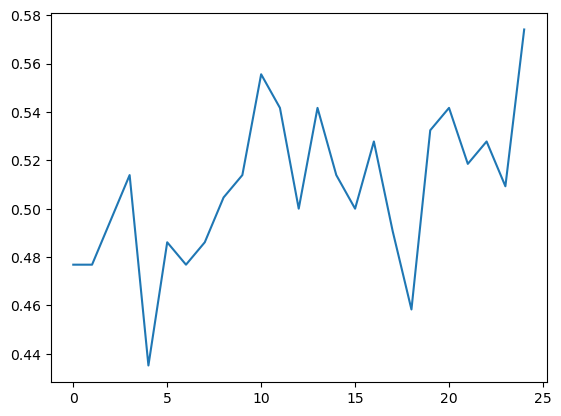

In [67]:
# Print the keys available in the 'history' object.
# This usually includes things like 'loss' and the metrics you chose to monitor, which are 'acc' and 'AUC' in this case.
print(history.history.keys())

# Plot training & validation accuracy values ('acc')
# The 'history.history' dictionary stores the history of training/validation accuracy and loss values for each epoch.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Add title and axis labels to the plot.
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Add a legend to specify which line corresponds to the training and validation phases.
plt.legend(['train', 'validation'], loc='upper left')

# Display the plot.
plt.show()

# Plot training & validation AUC values ('AUC')
# The 'history.history' dictionary stores the history of training/validation AUC values for each epoch.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Add title and axis labels to the plot.
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')

# Add a legend to specify which line corresponds to the training and validation phases.
plt.legend(['train', 'validation'], loc='upper left')

# Display the plot.
plt.show()

In [68]:
# Generate predictions using the trained model on the test data
y_pred = model.predict([X_text_test, X_numeric_test])

accuracy_score(y_test, y_pred.round())

2/2 [==============================] - 1s 270ms/step


0.5454545454545454

Excercises:

1) How does the language model predictions compare with those of KNN and the simple linear network introduced last week?
2) Play around with the hyperparameters and see if it changes anything
3) Do a grid search to optimize the hyperparameters (you might want to take a look at how we did it last week and use/modify that code)
